In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sampling helper
from sklearn.model_selection import train_test_split

# import preprocessing modules
from sklearn import preprocessing

# import regression linear model
from sklearn.linear_model import LinearRegression

# import KNN regressor model
from sklearn.neighbors import KNeighborsRegressor

# import mean squared error
from sklearn.metrics import mean_squared_error, r2_score

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(color_codes=True)

## Attribute information:

From <https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names>:

Given is the attribute name, attribute type, the measurement unit and a
brief description.  The number of rings is the value to predict: either
as a continuous value or as a classification problem.

```
Name		    Data Type	Meas.	Description
----		    ---------	-----	-----------
Sex		        nominal			    M, F, and I (infant)
Length		    continuous	mm	    Longest shell measurement
Diameter	    continuous	mm	    perpendicular to length
Height		    continuous	mm	    with meat in shell
Whole weight	continuous	grams	whole abalone
Shucked weight	continuous	grams	weight of meat
Viscera weight	continuous	grams	gut weight (after bleeding)
Shell weight	continuous	grams	after being dried
Rings		    integer			    +1.5 gives the age in years
```

In [2]:
abalone_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

columns = (['Sex','Length','Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weigth', 'Shell weigth', 'Rings'])

abalone = pd.read_csv(abalone_url, header=None, names=columns)
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weigth  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weigth  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [3]:
abalone.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weigth  Shell weigth        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

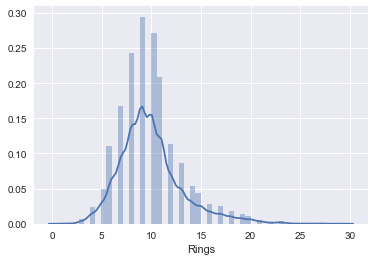

In [4]:
sns.distplot(abalone['Rings'])

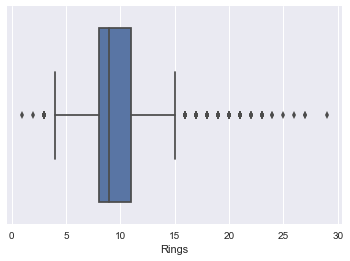

In [5]:
sns.boxplot(abalone['Rings'])

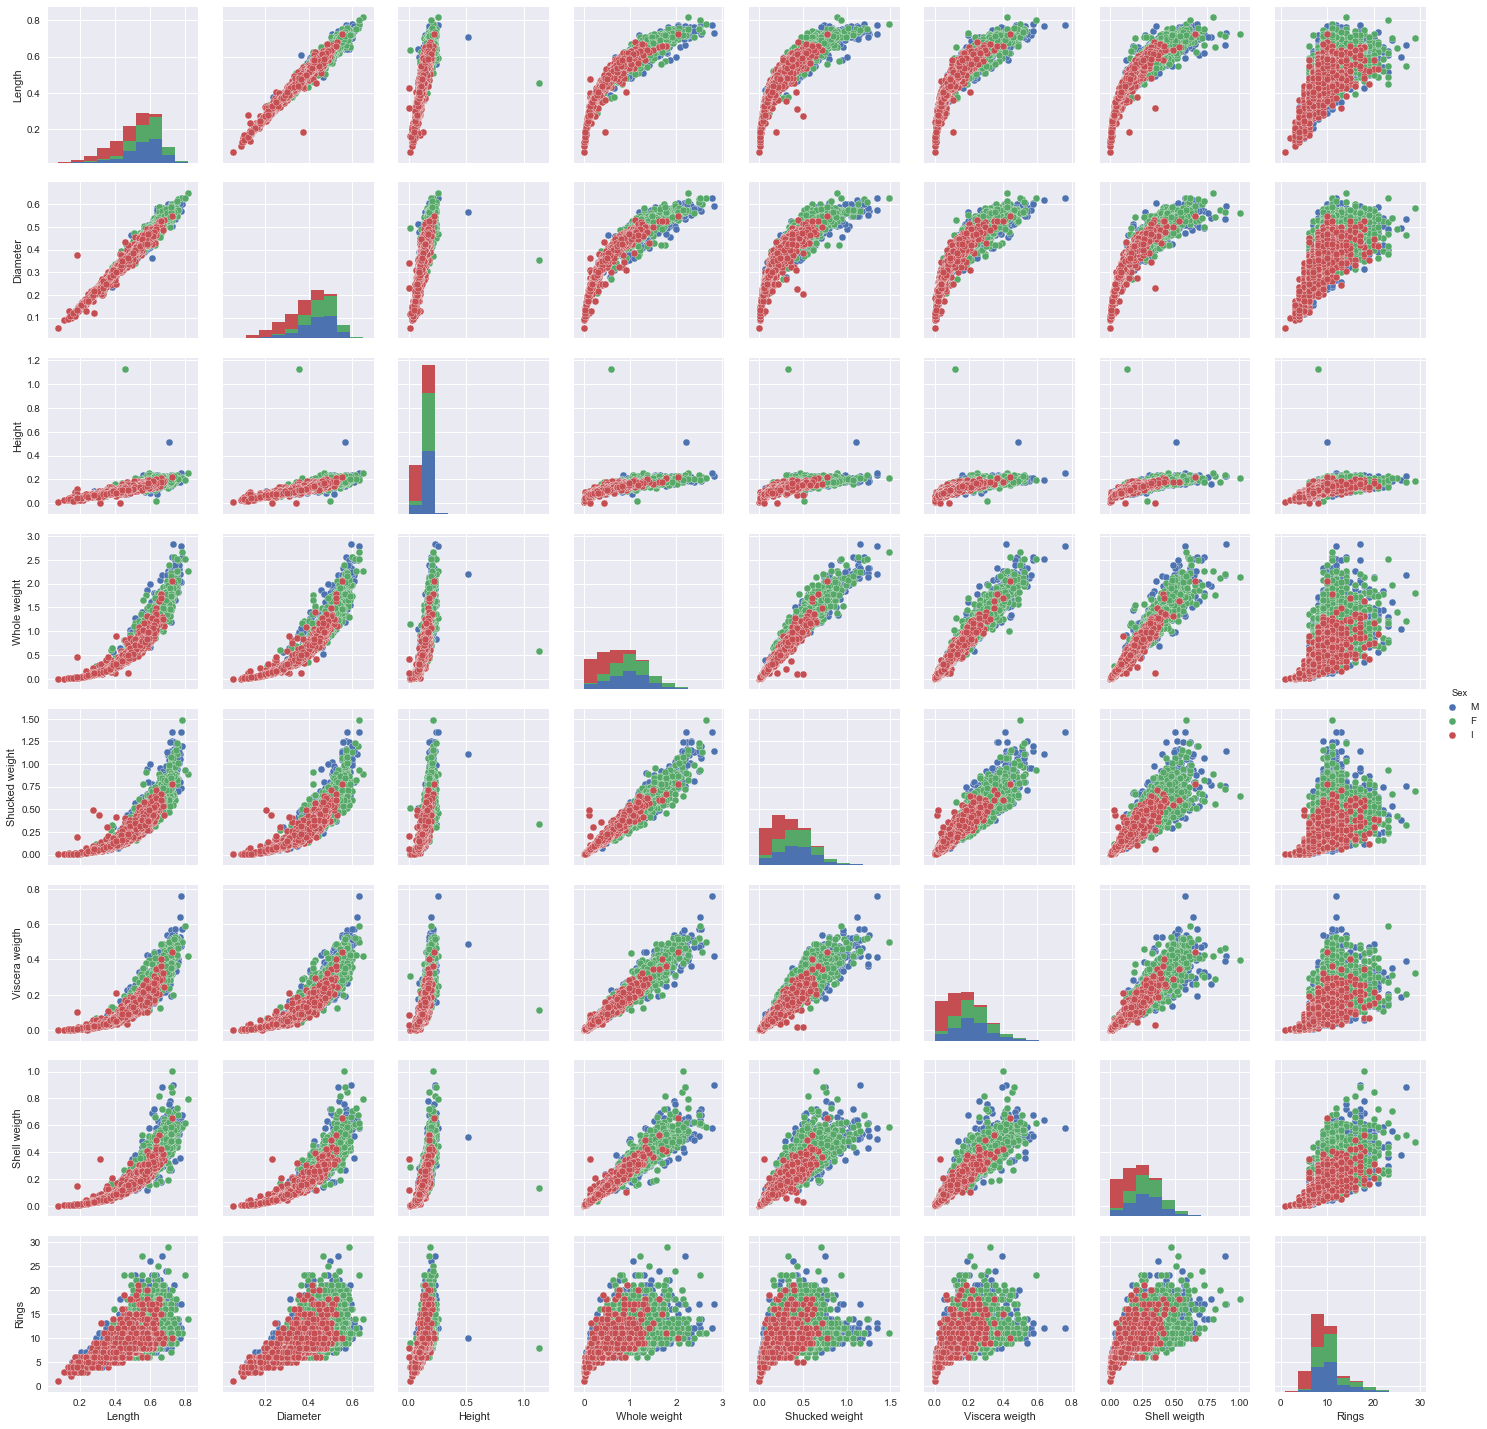

In [6]:
sns.pairplot(abalone, hue='Sex')

In [7]:
std_abalone = abalone.copy()
for col in abalone.columns.drop(['Sex']):
    std_abalone[col] = (abalone[col] - abalone[col].mean()) / abalone[col].std()
std_abalone.head()

Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0   M -0.574489 -0.432097 -1.064297     -0.641821       -0.607613   
1   M -1.448812 -1.439757 -1.183837     -1.230130       -1.170770   
2   F  0.050027  0.122116 -0.107978     -0.309432       -0.463444   
3   M -0.699393 -0.432097 -0.347058     -0.637743       -0.648160   
4   I -1.615350 -1.540523 -1.422916     -1.271933       -1.215822   

   Viscera weigth  Shell weigth     Rings  
0       -0.726125     -0.638140  1.571355  
1       -1.205077     -1.212842 -0.909904  
2       -0.356647     -0.207114 -0.289589  
3       -0.607527     -0.602222  0.020568  
4       -1.287183     -1.320599 -0.909904

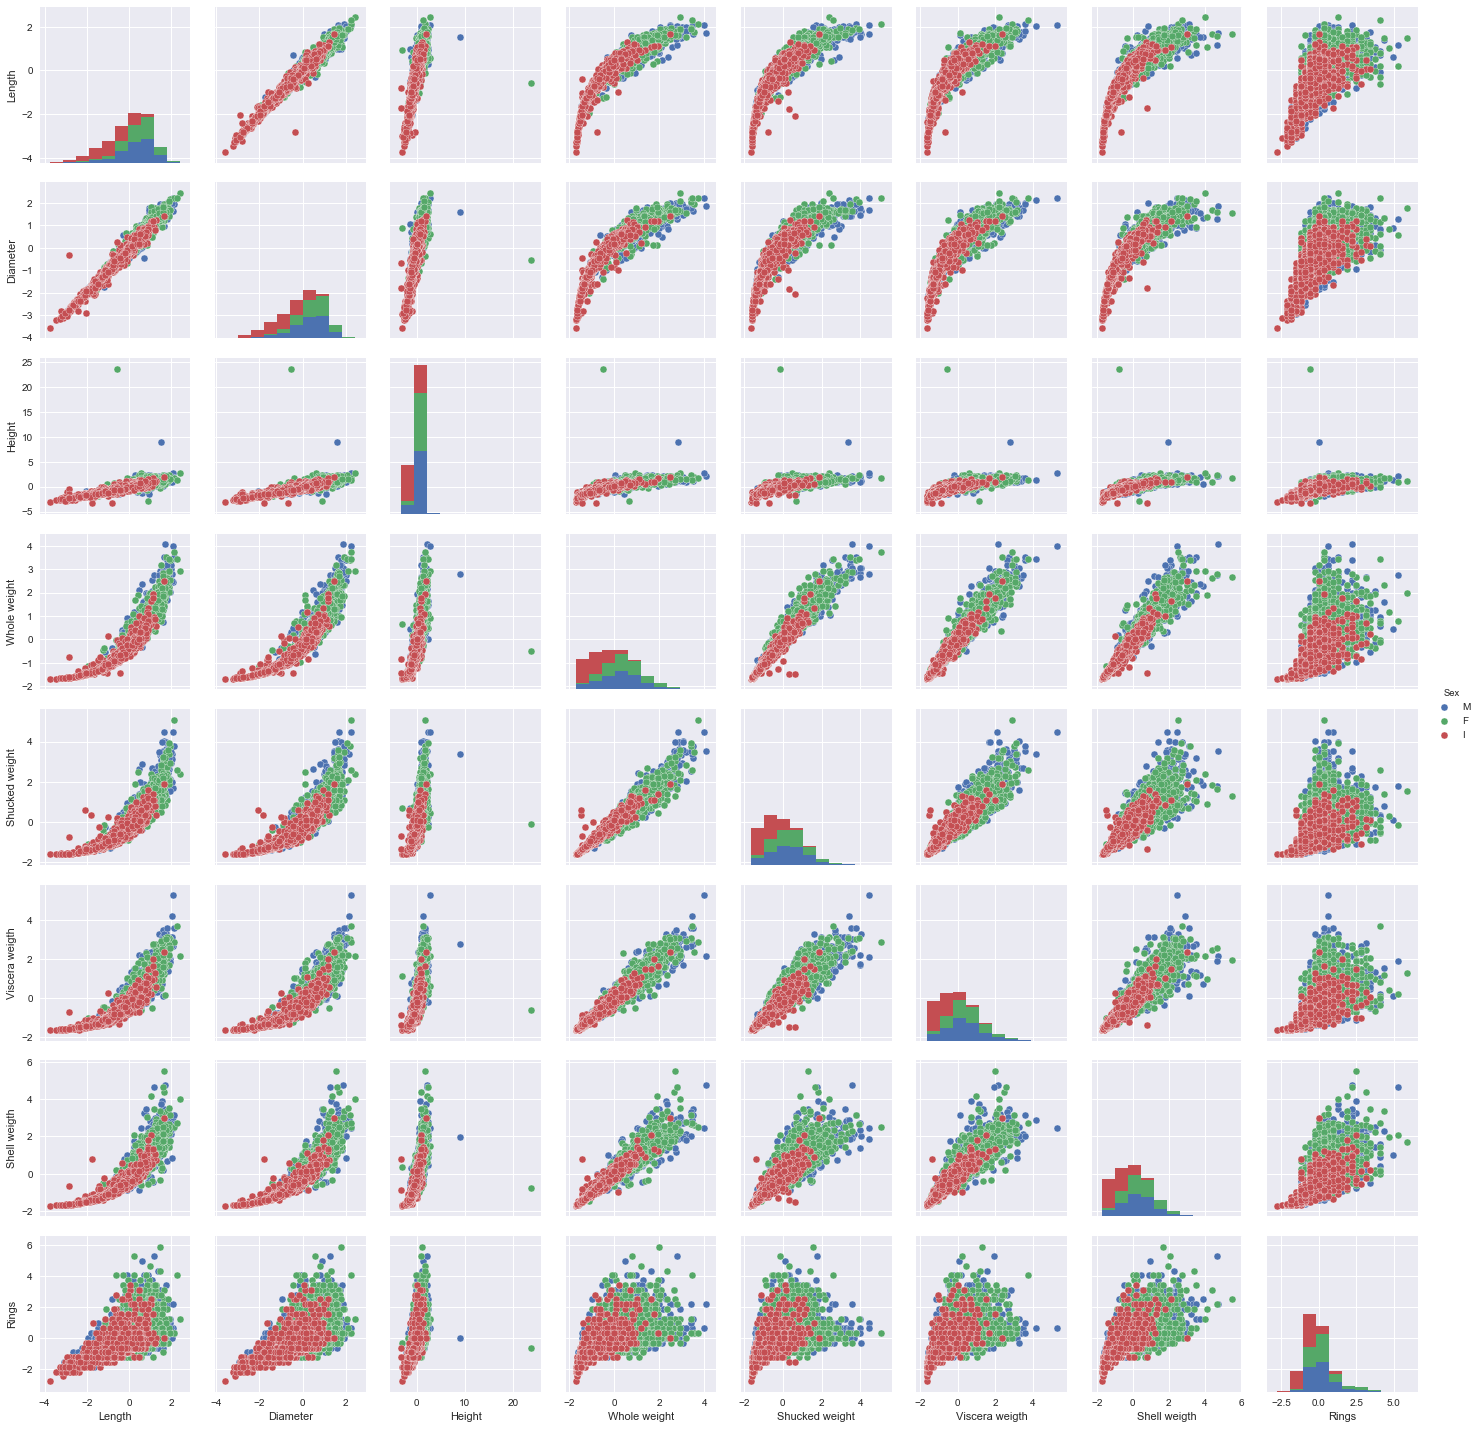

In [8]:
sns.pairplot(std_abalone, hue='Sex')

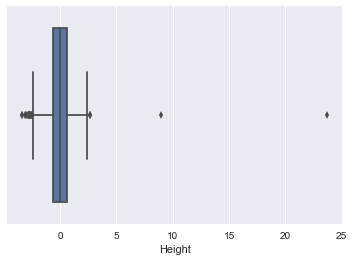

In [9]:
sns.boxplot(std_abalone['Height'])

In [10]:
std_abalone = std_abalone[std_abalone['Height'] < 5]

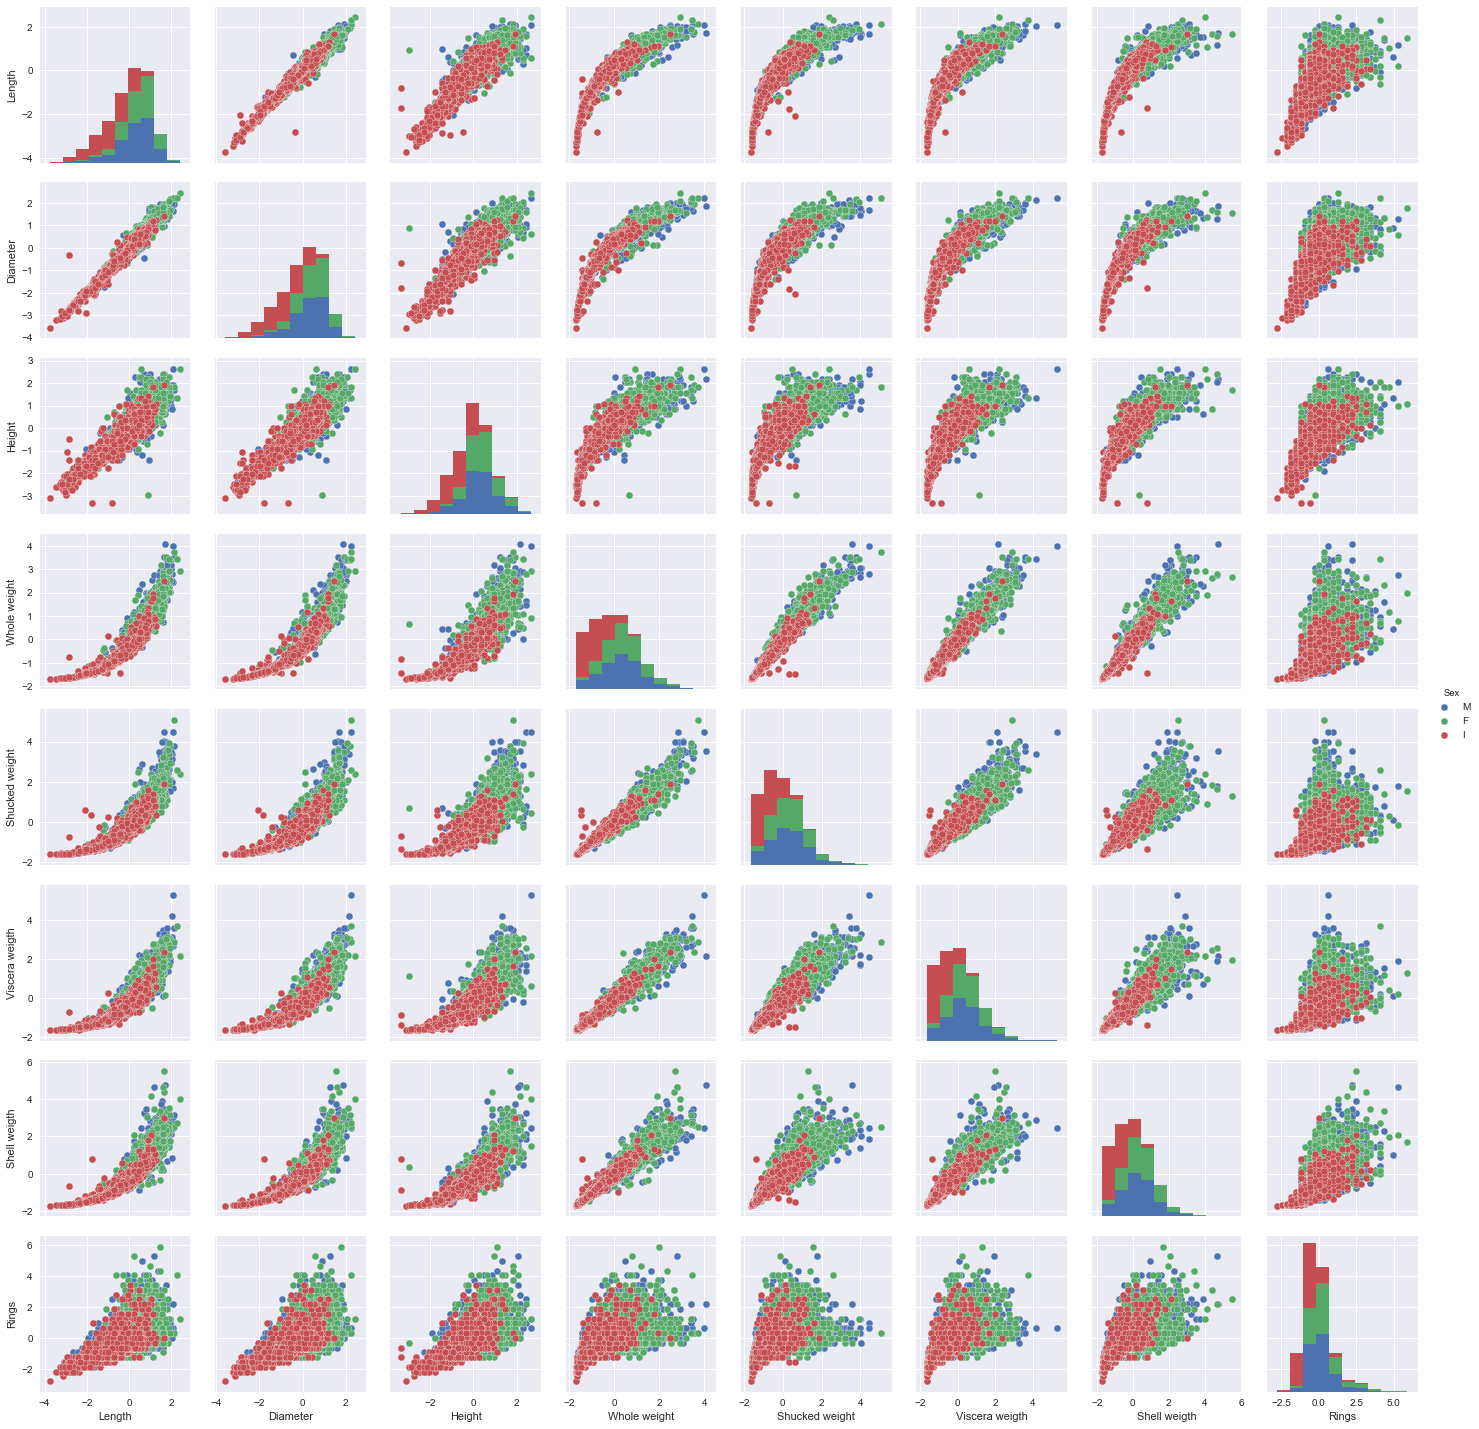

In [11]:
sns.pairplot(std_abalone, hue='Sex')

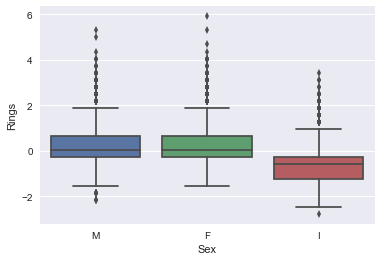

In [12]:
sns.boxplot(x="Sex", y="Rings", data=std_abalone)

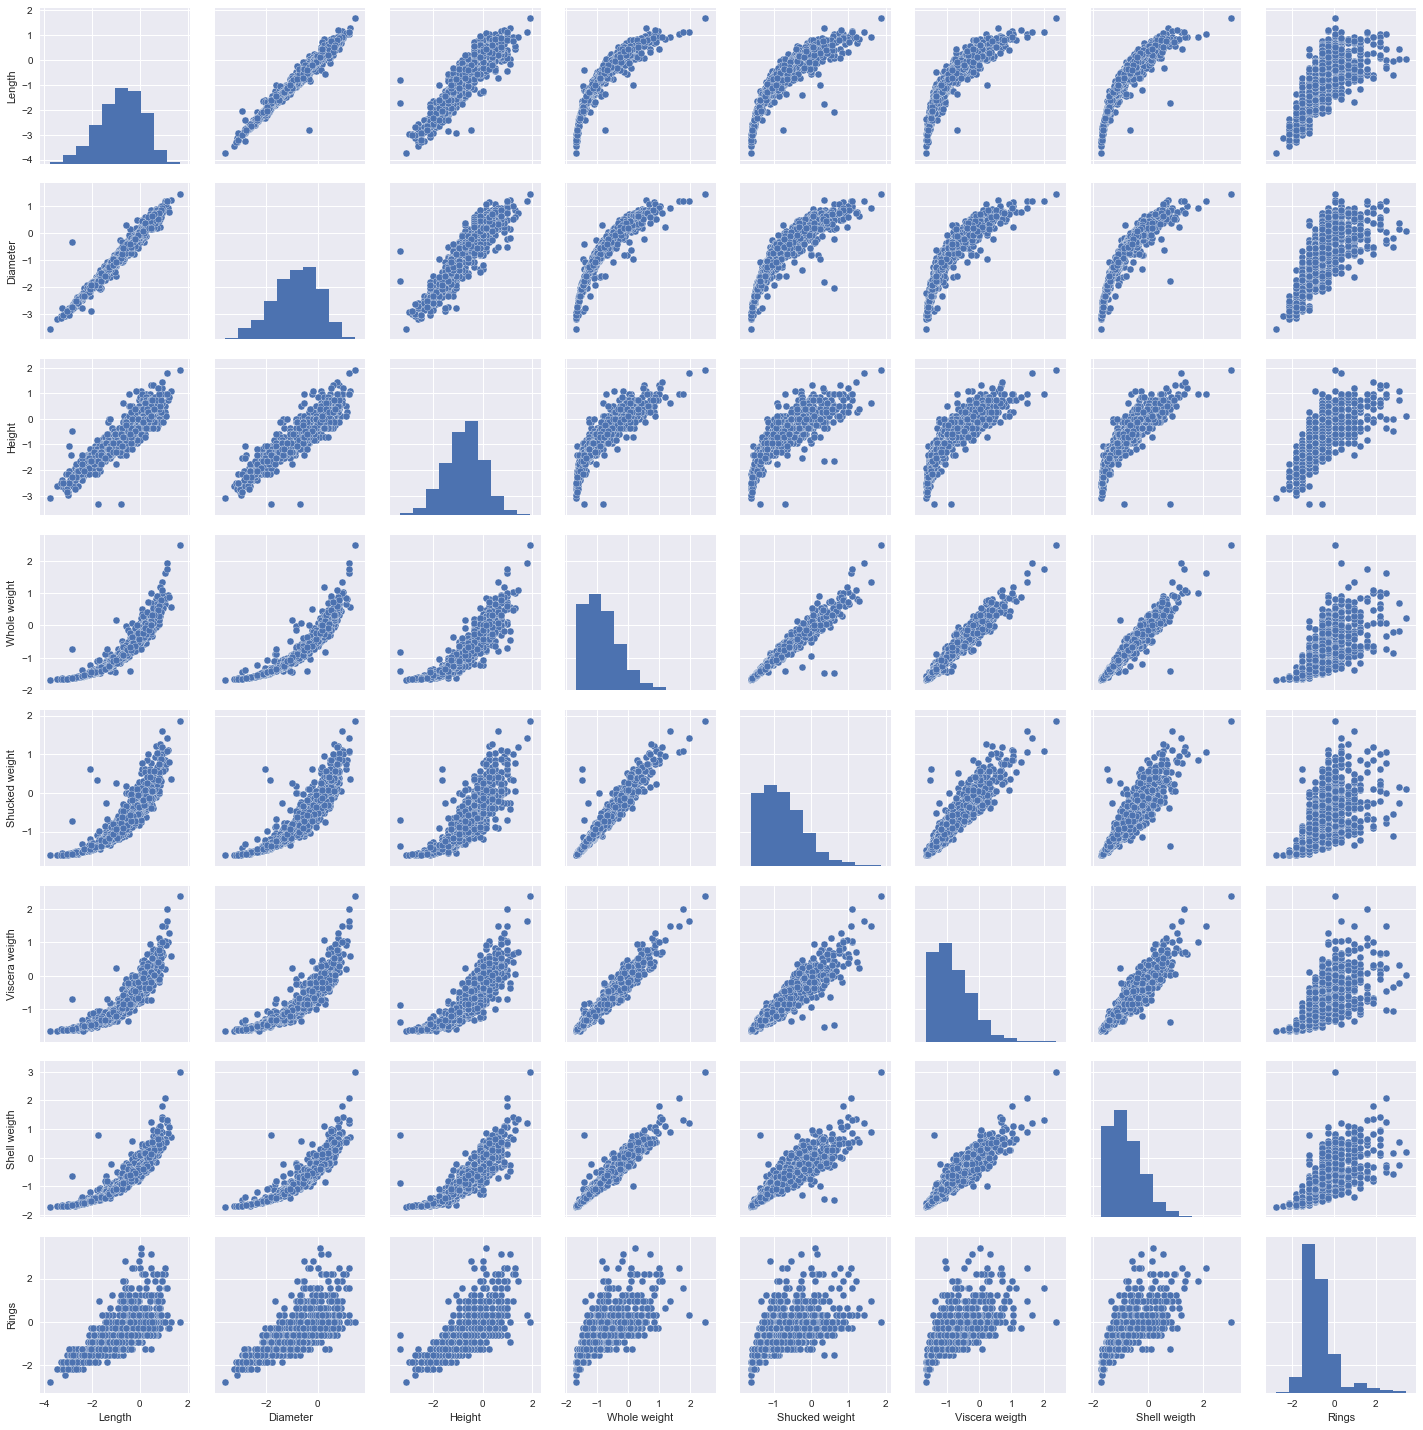

In [13]:
sns.pairplot(std_abalone[std_abalone['Sex'] == 'I'])

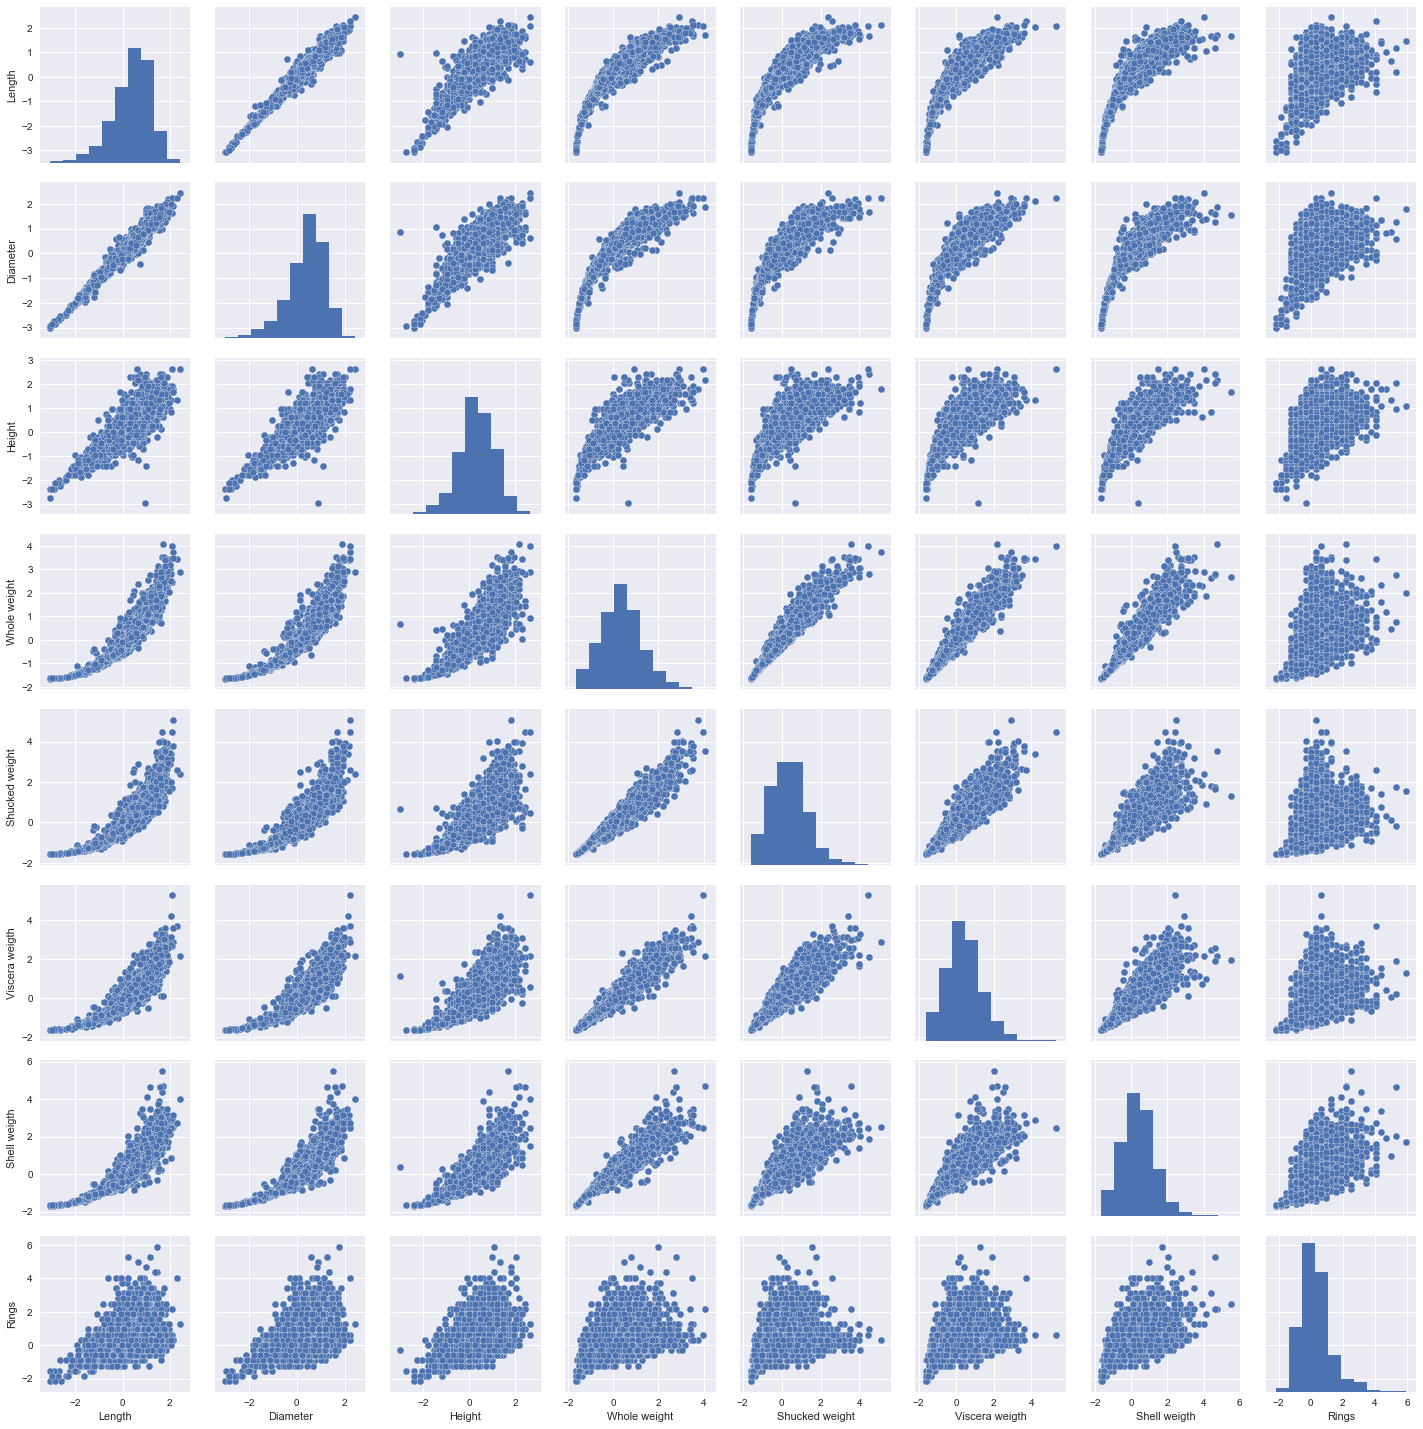

In [14]:
sns.pairplot(std_abalone[std_abalone['Sex'] != 'I'])

In [15]:
scl_abalone = abalone.copy()
for col in abalone.columns.drop(['Sex']):
    scl_abalone[col] = (abalone[col] - abalone[col].min()) / (abalone[col].max() - abalone[col].min())
scl_abalone.head()

Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
0   M  0.513514  0.521008  0.084071      0.181335        0.150303   
1   M  0.371622  0.352941  0.079646      0.079157        0.066241   
2   F  0.614865  0.613445  0.119469      0.239065        0.171822   
3   M  0.493243  0.521008  0.110619      0.182044        0.144250   
4   I  0.344595  0.336134  0.070796      0.071897        0.059516   

   Viscera weigth  Shell weigth     Rings  
0        0.132324      0.147982  0.500000  
1        0.063199      0.068261  0.214286  
2        0.185648      0.207773  0.285714  
3        0.149440      0.152965  0.321429  
4        0.051350      0.053313  0.214286

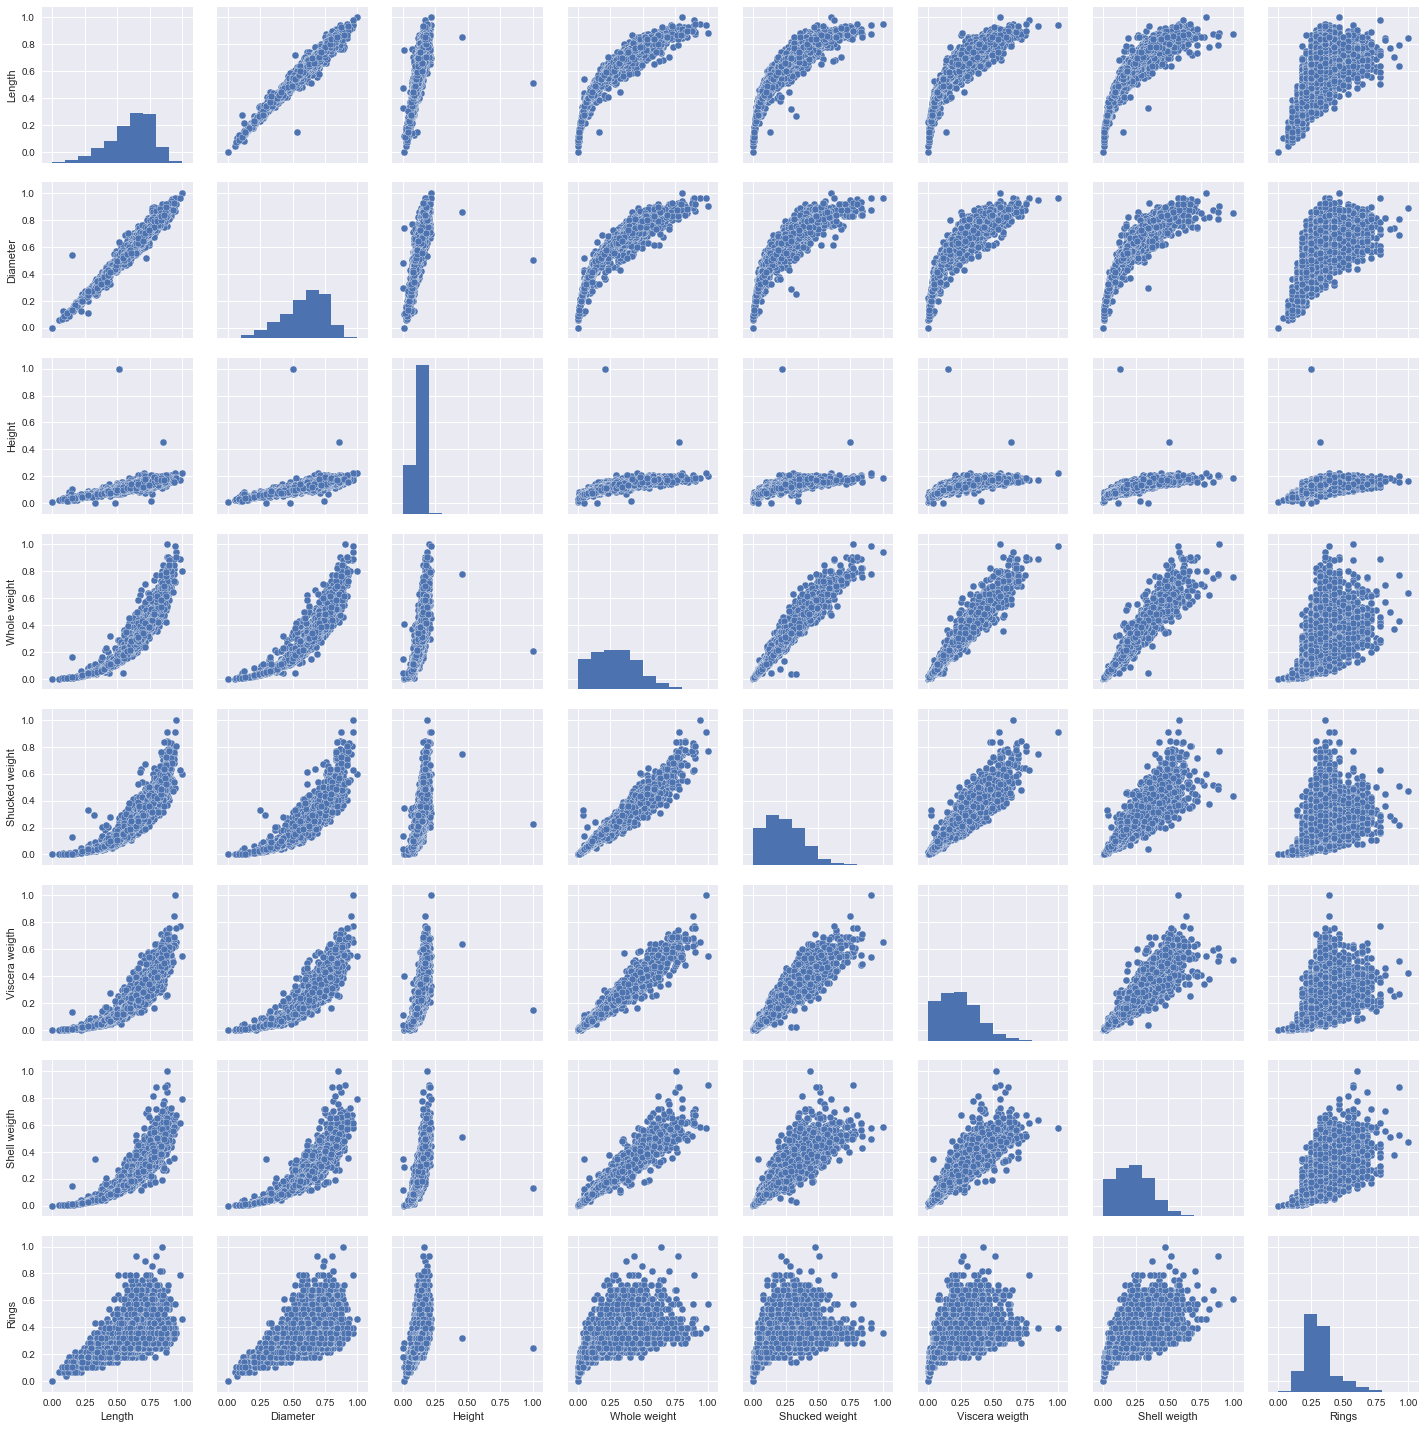

In [16]:
sns.pairplot(scl_abalone)

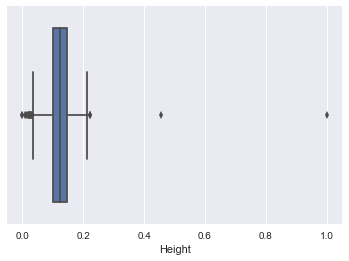

In [17]:
sns.boxplot(scl_abalone['Height'])

In [18]:
scl_abalone = scl_abalone[scl_abalone['Height'] < 0.4]

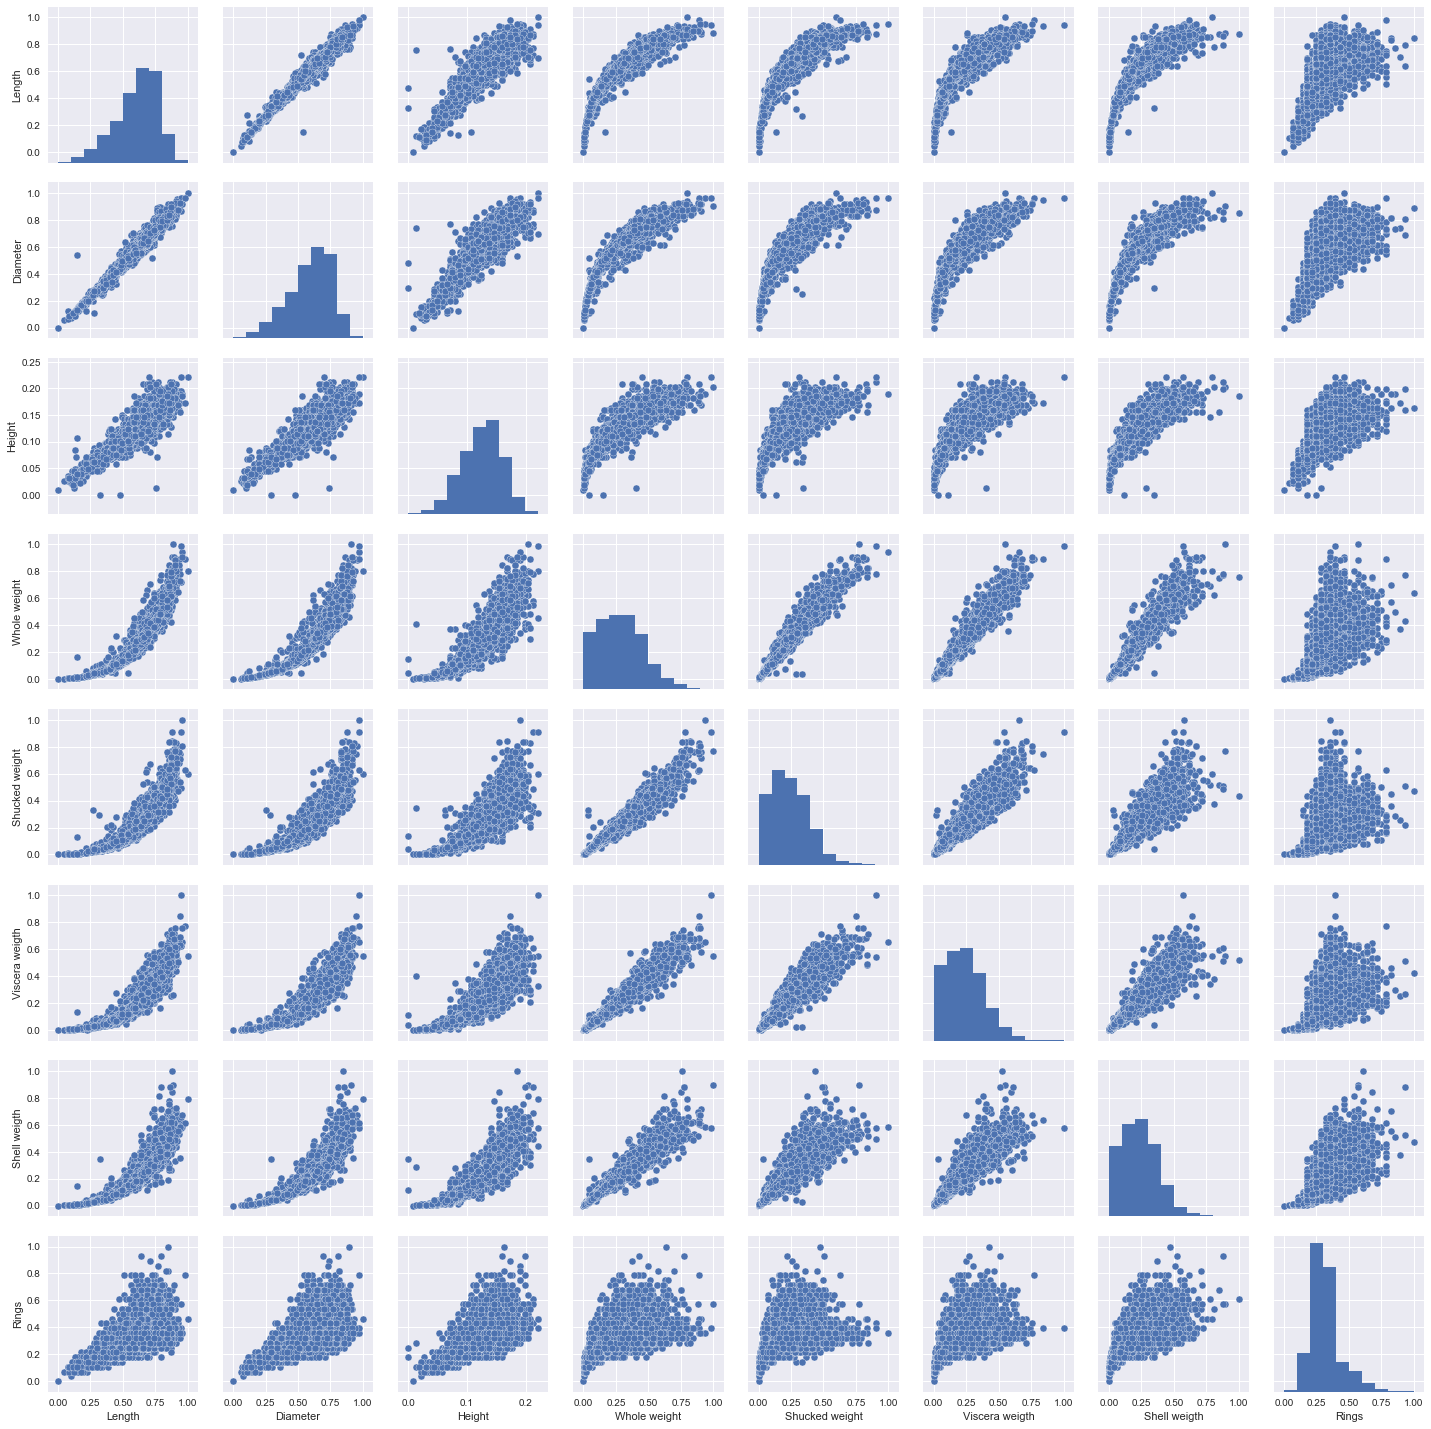

In [19]:
sns.pairplot(scl_abalone)

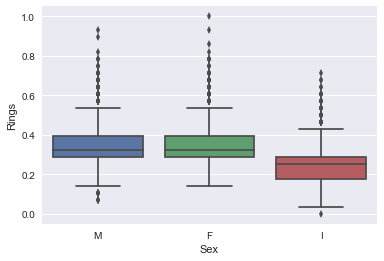

In [20]:
sns.boxplot(x="Sex", y="Rings", data=scl_abalone)

In [21]:
scaler = preprocessing.StandardScaler()
lm = LinearRegression()

y = abalone['Rings']
x = abalone.drop(columns=['Sex', 'Rings'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

scaler.fit(x_train)

lm.fit(scaler.transform(x_train), y_train)

y_predicted = lm.predict(scaler.transform(x_test))

print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_predicted)))
print('R2: {0:.4f}'.format(r2_score(y_test, y_predicted)))

MSE: 4.6163
R2: 0.5369


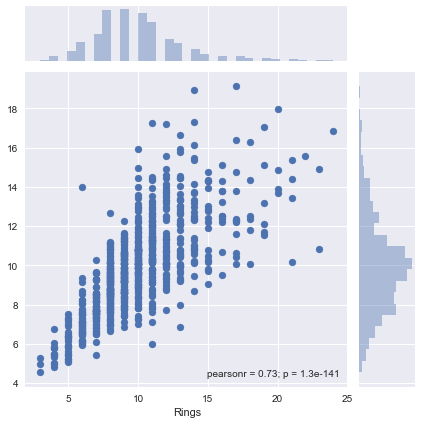

In [22]:
_ = sns.jointplot(y_test, y_predicted)

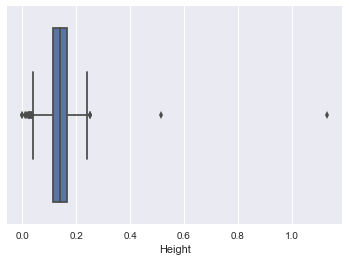

In [23]:
sns.boxplot(abalone['Height'])

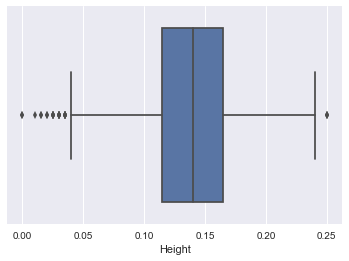

In [24]:
sns.boxplot(abalone[abalone['Height'] < 0.4]['Height'])

In [25]:
abalone2 = abalone[abalone['Height'] < 0.4]

y = abalone2['Rings']
x = abalone2.drop(columns=['Sex', 'Rings'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

scaler.fit(x_train)

lm.fit(scaler.transform(x_train), y_train)

y_predicted = lm.predict(scaler.transform(x_test))

print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_predicted)))
print('R2: {0:.4f}'.format(r2_score(y_test, y_predicted)))

MSE: 4.9578
R2: 0.5150


In [26]:
scaler_x = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()
lm = LinearRegression()

y = abalone['Rings']
x = abalone.drop(columns=['Sex', 'Rings'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

y_train = y_train.as_matrix().reshape(-1,1)

scaler_x.fit(x_train)
scaler_y.fit(y_train)

lm.fit(scaler_x.transform(x_train), scaler_y.transform(y_train))

y_predicted = scaler_y.inverse_transform(lm.predict(scaler.transform(x_test)))

print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_predicted)))
print('R2: {0:.4f}'.format(r2_score(y_test, y_predicted)))

MSE: 4.6124
R2: 0.5373


In [27]:
scaler_x = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()
lm = LinearRegression()

y = abalone['Rings']
x = abalone.drop(columns=['Sex', 'Rings'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

y_train = y_train.as_matrix().reshape(-1,1)

scaler_x.fit(x_train)
scaler_y.fit(y_train)

lm.fit(scaler_x.transform(x_train), scaler_y.transform(y_train))

y_predicted = scaler_y.inverse_transform(lm.predict(scaler.transform(x_test)))

print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_predicted)))
print('R2: {0:.4f}'.format(r2_score(y_test, y_predicted)))

MSE: 4.8616
R2: 0.5232


In [28]:
scaler_x = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()
lm = LinearRegression()

y = abalone['Rings']
x = abalone.drop(columns=['Sex', 'Rings'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

y_train = y_train.as_matrix().reshape(-1,1)

scaler_x.fit(x_train)
scaler_y.fit(y_train)

lm.fit(scaler_x.transform(x_train), scaler_y.transform(y_train))

y_predicted = scaler_y.inverse_transform(lm.predict(scaler.transform(x_test)))

print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_predicted)))
print('R2: {0:.4f}'.format(r2_score(y_test, y_predicted)))

MSE: 322.8124
R2: -30.6619


In [29]:
scaler_x = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()
lm = LinearRegression(fit_intercept=False)

y = abalone['Rings']
x = abalone.drop(columns=['Sex', 'Rings'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

y_train = y_train.as_matrix().reshape(-1,1)

scaler_x.fit(x_train)
scaler_y.fit(y_train)

lm.fit(scaler_x.transform(x_train), scaler_y.transform(y_train))

y_predicted = scaler_y.inverse_transform(lm.predict(scaler.transform(x_test)))

print('MSE: {0:.4f}'.format(mean_squared_error(y_test, y_predicted)))
print('R2: {0:.4f}'.format(r2_score(y_test, y_predicted)))

MSE: 4.6124
R2: 0.5373


In [42]:
y = abalone['Rings']
X = abalone.drop(columns=['Sex', 'Rings'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

n_values = [1, 3, 7, 13, 19, 23, 31, 47, 99]

for n in n_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    print('K={0}'.format(n))
    print('Train score {0:.3f}'.format(knn.score(X_train, y_train)))
    print('Train score {0:.3f}'.format(knn.score(X_test, y_test)))
    
n_values = [31, 33, 35, 37, 39]

for n in n_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    print('K={0}'.format(n))
    print('Train score {0:.3f}'.format(knn.score(X_train, y_train)))
    print('Train score {0:.3f}'.format(knn.score(X_test, y_test)))

K=1
Train score 1.000
Train score 0.150
K=3
Train score 0.744
Train score 0.424
K=7
Train score 0.656
Train score 0.506
K=13
Train score 0.622
Train score 0.528
K=19
Train score 0.605
Train score 0.532
K=23
Train score 0.596
Train score 0.535
K=31
Train score 0.579
Train score 0.538
K=47
Train score 0.560
Train score 0.529
K=99
Train score 0.517
Train score 0.504
K=31
Train score 0.579
Train score 0.538
K=33
Train score 0.576
Train score 0.536
K=35
Train score 0.574
Train score 0.537
K=37
Train score 0.571
Train score 0.536
K=39
Train score 0.570
Train score 0.534
